<a href="https://colab.research.google.com/github/BrenoMilagres/DataScienceProjetos_Python_R/blob/master/DesafioCappta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE ANALISTA DE DADOS Jr - Cappta - Breno Milagres 
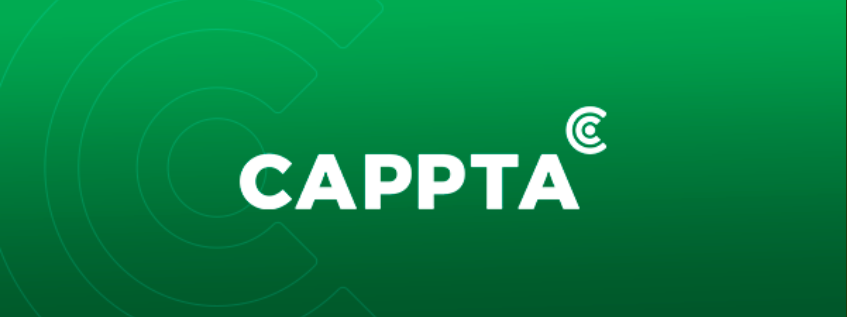

#### Objetivo

Converter 1.000 clientes nas cidades mais desbancarizadas do Brasil. Juntamente com o time, vocês definiram as seguintes ações para identificar as cidades que devemos realizar a nossa campanha.

- Classificar as cidades brasileira pelo nível de bancarização.
- Estimar o número de clientes convertidos em cada cidade.

#### ENTREGA FINAL

Lista com o número mínimo de cidades necessárias para atingir o objetivo com as seguintes
informações de cada cidade. Além disso, é necessário enviar todos os arquivos utilizados no trabalho.

- Nome da Cidade;
- Estado;
- População
- Nível de bancarização
- Clientes Convertidos

#### Importando a biblioteca pandas para processamento, transformação e extração dos dados, e matplotlib para plotagens.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1-) Classificar as cidades brasileiras pelo nível de bancarização.

#### Importando dados das agências

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 202010AGENCIAS.xlsx to 202010AGENCIAS.xlsx


In [3]:
df_agencias = pd.read_excel('202010AGENCIAS.xlsx',header=9)
df_agencias.head()

,CNPJ,SEQUENCIAL DO CNPJ,DV DO CNPJ,NOME INSTITUIÇÃO,SEGMENTO,CÓD COMPE AG,NOME AGÊNCIA,ENDEREÇO,NÚMERO,COMPLEMENTO,BAIRRO,CEP,MUNICíPIO,UF,DATA INÍCIO,DDD,FONE,ID INSTALAÇÃO
0,00.000.000,2.0,72.0,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,2.0,MANAUS ...,"R.GUILHERME MOREIRA,315",,"SUBLOJA,LOJA E 2.ANDAR ...",CENTRO,69005-300,MANAUS ...,AM,1908-01-14 00:00:00,92.0,36215500.0,9.999994e+09
1,00.000.000,3.0,53.0,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,3.0,PRESIDENTE VARGAS ...,"AV.PRES.VARGAS,248",,1.E 2.ANDARES ...,CAMPINA,66010-900,BELEM ...,PA,1908-07-01 00:00:00,91.0,32164888.0,9.999994e+09
2,00.000.000,4.0,34.0,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,4.0,SANTOS ...,"R.QUINZE DE NOVEMBRO,195",,...,CENTRO,11010-908,SANTOS ...,SP,1908-08-22 00:00:00,13.0,40097406.0,9.999994e+09
3,00.000.000,5.0,15.0,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,5.0,CAMPOS GOYTACAZES ...,"PCA.DAS QUATRO JORNADAS,11",,MEZANINO ...,CENTRO,28010-000,CAMPOS DOS GOYTACAZES ...,RJ,1910-06-26 00:00:00,22.0,27370405.0,9.999994e+09
4,00.000.000,6.0,4.0,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,6.0,SALVADOR ...,"SEXTA AVENIDA,600",,SECRETARIA DA EDUCACAO-TERREO ...,CAB,41745-002,SALVADOR ...,BA,1910-07-15 00:00:00,71.0,33628803.0,9.999994e+09


#### Realizando Tratamentos


Através da anállise do arquivo excel foi possível verificar que os nomes de todas as colunas possuiam espaços indesejados, então foi necessário renomear as colunas interessantes.

In [4]:
df_agencias = df_agencias.rename(columns={'CNPJ      ':'CNPJ',
                                      'NOME INSTITUIÇÃO                                                                                                                                                                                        ':'Instituição',
                                      'MUNICíPIO                                                   ':'Municipio',
                                      'ID INSTALAÇÃO                                                                       ':'ID_Instalação',
                                      'UF':'Estado'})

Definindo colunas interessantes 

In [5]:
x = ['ID_Instalação','CNPJ','Instituição','Municipio','Estado']
df_agencias = df_agencias[x]

Eliminando valores nulos

In [6]:
df_agencias = df_agencias.dropna()

In [7]:
df_agencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19553 entries, 0 to 19552
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Instalação  19553 non-null  float64
 1   CNPJ           19553 non-null  object 
 2   Instituição    19553 non-null  object 
 3   Municipio      19553 non-null  object 
 4   Estado         19553 non-null  object 
dtypes: float64(1), object(4)
memory usage: 916.5+ KB


#### Importando dados de postos de atendimento

> Os tratamentos são basicamente os  mesmos do Dataframe Agencias.

In [8]:
uploaded = files.upload()

Saving 202010POSTOS.xlsx to 202010POSTOS.xlsx


In [10]:
df_postos = pd.read_excel('202010POSTOS.xlsx',header=9)
df_postos.head()

,CNPJ,NOME INSTITUIÇÃO,SEGMENTO,NOME INSTALAÇÃO,ENDEREÇO,NÚMERO,COMPLEMENTO,BAIRRO,CEP,MUNICIPIO,UF,DDD,FONE,TIPO DE DEPENDÊNCIA,CNPJ DA ENTIDADE A,NOME DA ENTIDADE ASSISTIDA,ID INSTALAÇÃO,Unnamed: 17,Unnamed: 18
0,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,ASSIS BRASIL ...,AV RAIMUNDO CHAAR 392,,...,CENTRO,69935-000,ASSIS BRASIL ...,AC,68,35481178,Posto Avançado de Atendimento - PAA ...,00.000.000/3489-45,...,9999255477,NaN,NaN
1,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,BUJARI ...,"BR 364,KM 28",,4010,CENTRO,69926-970,BUJARI ...,AC,68,32311172,Posto Avançado de Atendimento - PAA ...,00.000.000/4112-21,...,9999301491,NaN,NaN
2,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,UNINORTE ...,"AL.HUNGRIA,200",,"ROD.BR-364,KM 2 ...",JARDIM EUROPA,69915-901,RIO BRANCO ...,AC,68,32267860,Posto de Atendimento Bancário - PAB ...,04.515.940/0001-74,UNIAO EDUCACIONAL DO NORTE LTDA ...,9999780544,NaN,NaN
3,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,AV.RIO BRANCO ...,"R.ARLINDO PORTO LEAL,85",,...,CENTRO,69900-058,RIO BRANCO ...,AC,68,40033001,Posto de Atendimento Bancário - PAB ...,00.000.000/0071-02,BANCO DO BRASIL S.A. ...,9999214036,NaN,NaN
4,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,ANADIA ...,"AV.MOREIRA LIMA,13",,...,CENTRO,57660-000,ANADIA ...,AL,82,32771142,Posto Avançado de Atendimento - PAA ...,,ANADIA ...,9999952358,NaN,NaN


In [11]:
df_postos = df_postos.rename(columns={'CNPJ      ':'CNPJ',
                                      'NOME INSTITUIÇÃO                                                                                                                                                                                        ':'Instituição',
                                      'MUNICIPIO                                                   ':'Municipio',
                                      'ID INSTALAÇÃO                                                         ':'ID_Instalação'})


In [12]:
x = ['ID_Instalação','CNPJ','Instituição','Municipio']
df_postos = df_postos[x]


In [13]:
df_postos = df_postos.dropna()

In [14]:
df_postos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18489 entries, 0 to 18488
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Instalação  18489 non-null  object
 1   CNPJ           18489 non-null  object
 2   Instituição    18489 non-null  object
 3   Municipio      18489 non-null  object
dtypes: object(4)
memory usage: 722.2+ KB


#### Importando dados de postos eletrônicos

In [15]:
uploaded = files.upload()

Saving 202010PAE.xlsx to 202010PAE.xlsx


In [16]:
df_postosE = pd.read_excel('202010PAE.xlsx',header=9)
df_postosE.head()

,CNPJ,NOME INSTITUIÇÃO,SEGMENTO,NOME INSTALAÇÃO,ENDEREÇO,NÚMERO,COMPLEMENTO,BAIRRO,CEP,MUNICIPIO,UF,DDD,FONE,CNPJ DA ENTIDADE A,NOME DA ENTIDADE ASSISTIDA,ID INSTALAÇÃO
0,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,MIAMI/E.U.A. ...,,,...,,0 -,MIAMI ...,,0.0,0.0,00.000.000/0000-00,MIAMI/E.U.A. ...,9.999948e+09
1,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,NOVA IORQUE/E.U.A. ...,,,...,,0 -,NEW YORK ...,,0.0,0.0,00.000.000/0000-00,NOVA IORQUE/E.U.A. ...,9.999948e+09
2,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,SAA-ACRELANDIA ...,"AV.PARANA,344",,ESQ.C/GERALDO BARBOSA ...,CENTRO,69945-000,ACRELANDIA ...,AC,0.0,0.0,,...,9.999747e+09
3,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,SAA-ASSIS BRASIL ...,"AV.RAIMUNDO CHAAR,392",,...,CENTRO,69935-000,ASSIS BRASIL ...,AC,0.0,0.0,,...,9.999752e+09
4,00.000.000,BANCO DO BRASIL S.A. ...,Banco do Brasil - Banco Múltiplo ...,SAA-BRASILEIA ...,"AV.MANOEL MARINHO MONTE,S/N",,...,TRES BOTEQUINS,69932-970,BRASILEIA ...,AC,0.0,0.0,,...,9.999467e+09


In [17]:
df_postosE = df_postosE.rename(columns={'CNPJ      ':'CNPJ',
                                      'NOME INSTITUIÇÃO                                                                                                                                                                                        ':'Instituição',
                                      'MUNICIPIO                                                   ':'Municipio',
                                      'ID INSTALAÇÃO                                                                                                                      ':'ID_Instalação'})

In [18]:
x = ['ID_Instalação','CNPJ','Instituição','Municipio']
df_postosE = df_postosE[x]

In [19]:
df_postosE = df_postosE.dropna()

In [20]:
df_postosE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28866 entries, 0 to 28865
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Instalação  28866 non-null  float64
 1   CNPJ           28866 non-null  object 
 2   Instituição    28866 non-null  object 
 3   Municipio      28866 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


#### Efetuando cálculos 


Número de agêcias por municipio.

In [21]:
n_agencias_municipio = df_agencias['Municipio'].value_counts().reset_index()
n_agencias_municipio =  n_agencias_municipio.rename(columns={'index':'Municipio','Municipio':'n_agencias'})
n_agencias_municipio

,Municipio,n_agencias
0,SAO PAULO ...,2263
1,RIO DE JANEIRO ...,1037
2,BELO HORIZONTE ...,373
3,PORTO ALEGRE ...,347
4,CURITIBA ...,347
...,...,...
3136,BOA VISTA DO INCRA ...,1
3137,NOVA GLORIA ...,1
3138,AURILANDIA ...,1
3139,PORTEIRAS ...,1


Número de Postos por municipio

In [22]:
n_postos_municipio = df_postos['Municipio'].value_counts().reset_index()
n_postos_municipio =  n_postos_municipio.rename(columns={'index':'Municipio','Municipio':'n_postos'})
n_postos_municipio

,Municipio,n_postos
0,SAO PAULO ...,1161
1,RIO DE JANEIRO ...,537
2,BELO HORIZONTE ...,296
3,CURITIBA ...,259
4,BRASILIA ...,247
...,...,...
4459,VITORIA DO JARI ...,1
4460,BELO MONTE ...,1
4461,ITAGUARU ...,1
4462,VEREDINHA ...,1


Número de Postos Eletronicos por municipio

In [23]:
n_postosE_municipio = df_postosE['Municipio'].value_counts().reset_index()
n_postosE_municipio =  n_postosE_municipio.rename(columns={'index':'Municipio','Municipio':'n_postosE'})
n_postosE_municipio

,Municipio,n_postosE
0,SAO PAULO ...,1970
1,RIO DE JANEIRO ...,1220
2,BRASILIA ...,607
3,PORTO ALEGRE ...,527
4,BELO HORIZONTE ...,519
...,...,...
4582,MARTINS ...,1
4583,GUAPIRAMA ...,1
4584,CLARO DOS POCOES ...,1
4585,PEDRAS GRANDES ...,1


#### importando dados da população por municipio

In [24]:
df_pop = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Brasil_por_popula%C3%A7%C3%A3o_(2020)',header=0)[0]
df_pop = df_pop.rename(columns={'Município':'Municipio','Unidade federativa':'Estado'})
x = ['Municipio','População','Estado']
df_pop = df_pop[x]

Efetuando transformção da coluna populção para int e removendo caracteres indesejados

In [25]:
 df_pop['População'] = df_pop["População"].str.replace("\xa0", "", regex=False).astype(int)
 df_pop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Municipio  5570 non-null   object
 1   População  5570 non-null   int64 
 2   Estado     5570 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [26]:
df_pop['Municipio'].unique()

array(['São Paulo', 'Rio de Janeiro', 'Brasília', ..., 'Araguainha',
       'Borá', 'Serra da Saudade'], dtype=object)

Para efetuar o merge entre os dataFrames é necessário tratar as diferenças entre as colunas 'Municipio', retirando acentos e caracteres especiais e também mudando todas as letras para maiúsculas.

In [27]:
def corrigir_nomes(nome):
    nome = nome.replace('ã', 'a').replace('ç', 'c').replace('ô', 'o').replace('é', 'e').replace('í','i').replace('á','a').replace('â','a').replace('ó','o').replace('ú','u')
    return nome

df_pop['Municipio'] = df_pop['Municipio'].apply(corrigir_nomes)
df_pop['Municipio'] = df_pop['Municipio'].str.upper()
df_pop.head()

,Municipio,População,Estado
0,SAO PAULO,12325232,São Paulo
1,RIO DE JANEIRO,6747815,Rio de Janeiro
2,BRASILIA,3055149,Distrito Federal
3,SALVADOR,2886698,Bahia
4,FORTALEZA,2686612,Ceará


#### Unindo dataFrames

In [28]:
df_bancariza =pd.merge(n_postos_municipio,n_postosE_municipio) 
df_bancariza.head()

,Municipio,n_postos,n_postosE
0,SAO PAULO ...,1161,1970
1,RIO DE JANEIRO ...,537,1220
2,BELO HORIZONTE ...,296,519
3,CURITIBA ...,259,353
4,BRASILIA ...,247,607


In [29]:
df_bancariza =pd.merge(n_agencias_municipio,df_bancariza)
df_bancariza.head()

,Municipio,n_agencias,n_postos,n_postosE
0,SAO PAULO ...,2263,1161,1970
1,RIO DE JANEIRO ...,1037,537,1220
2,BELO HORIZONTE ...,373,296,519
3,PORTO ALEGRE ...,347,236,527
4,CURITIBA ...,347,259,353


Retirando espaços indesejados 

In [30]:
df_bancariza['Municipio'].unique()

array(['SAO PAULO                                                   ',
       'RIO DE JANEIRO                                              ',
       'BELO HORIZONTE                                              ',
       ...,
       'NOVA GLORIA                                                 ',
       'PORTEIRAS                                                   ',
       'SAO JOAO DO MANTENINHA                                      '],
      dtype=object)

In [31]:
df_bancariza['Municipio']=df_bancariza['Municipio'].str.strip()
df_bancariza['Municipio'].unique()


array(['SAO PAULO', 'RIO DE JANEIRO', 'BELO HORIZONTE', ...,
       'NOVA GLORIA', 'PORTEIRAS', 'SAO JOAO DO MANTENINHA'], dtype=object)

In [32]:
df_bancariza =pd.merge(df_pop,df_bancariza)
df_bancariza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2690 entries, 0 to 2689
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Municipio   2690 non-null   object
 1   População   2690 non-null   int64 
 2   Estado      2690 non-null   object
 3   n_agencias  2690 non-null   int64 
 4   n_postos    2690 non-null   int64 
 5   n_postosE   2690 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 147.1+ KB


In [33]:
df_bancariza.head()

,Municipio,População,Estado,n_agencias,n_postos,n_postosE
0,SAO PAULO,12325232,São Paulo,2263,1161,1970
1,RIO DE JANEIRO,6747815,Rio de Janeiro,1037,537,1220
2,BRASILIA,3055149,Distrito Federal,286,247,607
3,SALVADOR,2886698,Bahia,254,150,362
4,FORTALEZA,2686612,Ceará,182,95,226


Dropando valores duplicados

In [35]:
df_bancariza = df_bancariza.drop_duplicates('Municipio')
df_bancariza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2689
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Municipio   2460 non-null   object
 1   População   2460 non-null   int64 
 2   Estado      2460 non-null   object
 3   n_agencias  2460 non-null   int64 
 4   n_postos    2460 non-null   int64 
 5   n_postosE   2460 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 134.5+ KB


#### Efetuando cálculo do nível de bancarização em cada município.

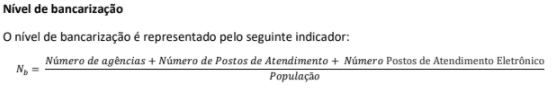


In [37]:
df_bancariza['indicador'] = (df_bancariza['n_agencias']+df_bancariza['n_postos']+df_bancariza['n_postosE'])/df_bancariza['População']
df_bancariza = df_bancariza.sort_values('indicador',ascending=True)
df_bancariza.head()

,Municipio,População,Estado,n_agencias,n_postos,n_postosE,indicador
195,TIMON,170222,Maranhão,5,2,4,0.000065
473,CIDADE OCIDENTAL,72890,Goiás,2,1,2,0.000069
753,PEDRA BRANCA,43309,Ceará,1,1,1,0.000069
50,BELFORD ROXO,513118,Rio de Janeiro,14,5,17,0.000070
184,IBIRITE,182153,Minas Gerais,5,3,6,0.000077


#### Verificando a distribuição do nível de bancarização das cidades brasileiras

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


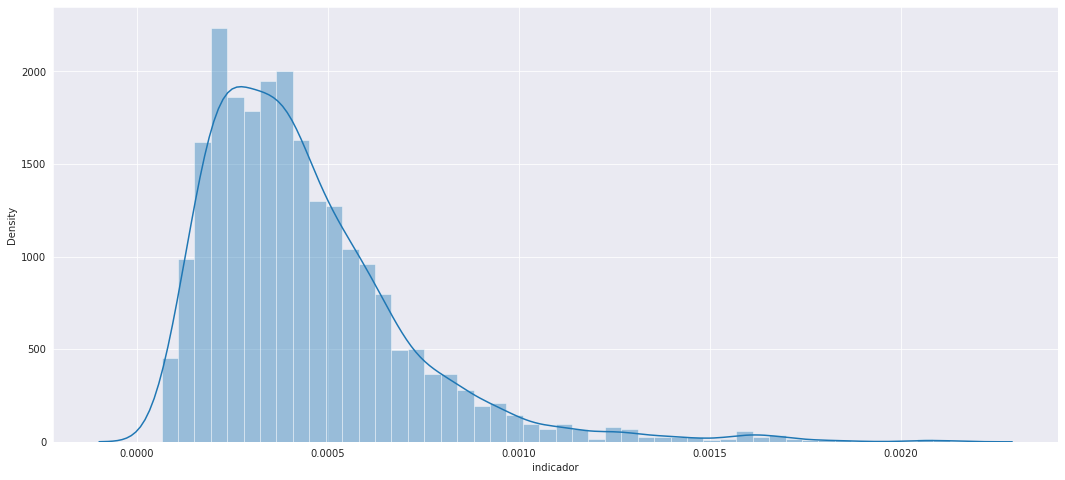

In [81]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.distplot(df_bancariza.indicador)

#### Verificando média do indicador de bancarização por estado.

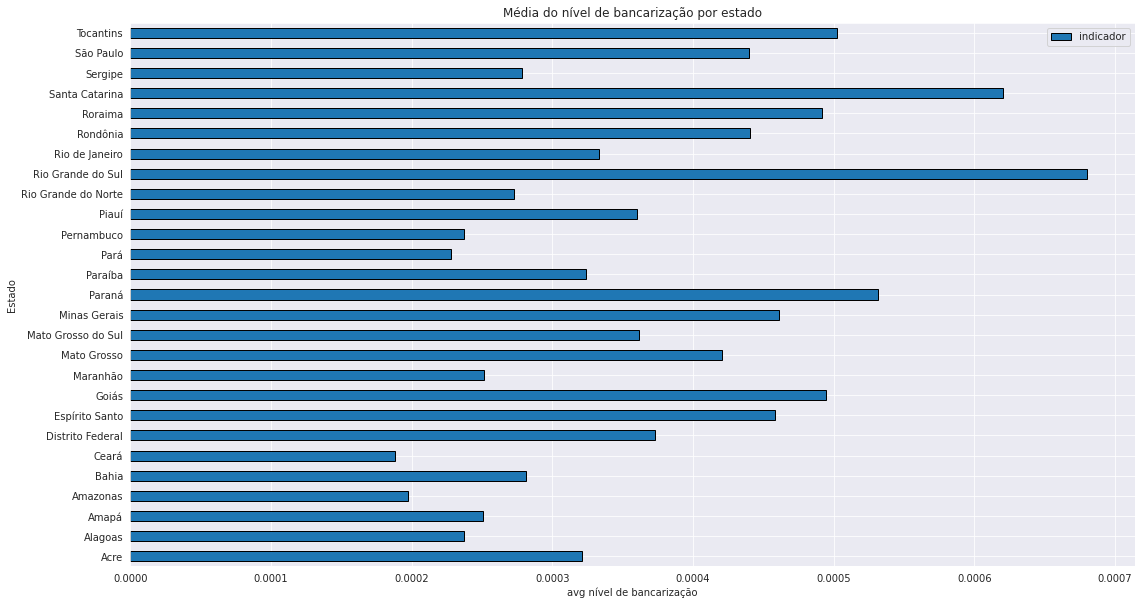

In [95]:
df_bancariza.groupby("Estado").agg({"indicador":"mean"}).plot(kind="barh",
                                                              figsize = (18,10),
                                                               edgecolor = "k",
                                                               linewidth =1
                                                                                )
plt.title("Média do nível de bancarização por estado")
plt.xlabel("avg nível de bancarização")
plt.show()

# 2-) Estimar o número de clientes convertidos em cada cidade.

#### Obtendo dados da população Estadual 

In [46]:
df_pop_uf = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o',header=0)[0]
df_pop_uf.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


Retirando espaços indesejados e transformando a coluna 'População' para int

In [47]:
 df_pop_uf['População'] = df_pop_uf["População"].str.replace(" ", "", regex=False).astype(int)
 df_pop_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Posição                       27 non-null     int64 
 1   Unidade federativa            27 non-null     object
 2   População                     27 non-null     int64 
 3   % da pop. total               27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


Definindo e renomeando colunas interessantes

In [48]:
df_pop_uf = df_pop_uf.rename(columns={'Unidade federativa':'Estado'})
x = ['Estado','População']
df_pop_uf = df_pop_uf[x]
df_pop_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Estado     27 non-null     object
 1   População  27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


#### Obtendo dados dos celulares pós pagos

In [49]:
df_cels = pd.read_html('https://www.teleco.com.br/nceluf.asp',header=0)[107]
df_cels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Região                32 non-null     object
 1   Região.1              32 non-null     object
 2   Estado                32 non-null     object
 3   Dez 2019  (milhares)  32 non-null     object
 4   Setembro de 2020      32 non-null     object
 5   Setembro de 2020.1    32 non-null     object
 6   Setembro de 2020.2    32 non-null     object
 7   Setembro de 2020.3    32 non-null     object
dtypes: object(8)
memory usage: 2.1+ KB


- Definindo e renomeando colunas interessantes
- Dropando linhas indesejadas

In [50]:
df_cels = df_cels.rename(columns={'Setembro de 2020.1':'pre_pagos','Dez 2019  (milhares)':'total_linhas'})
x = ['Estado','pre_pagos','total_linhas']
df_cels = df_cels[x]

df_cels = df_cels.drop(0)
df_cels = df_cels.drop(28)
df_cels = df_cels.drop(29)
df_cels = df_cels.drop(30)
df_cels = df_cels.drop(31)
df_cels


,Estado,pre_pagos,total_linhas
1,Rio de Janeiro,8.311,18.710
2,Espírito Santo,1.942,3.932
3,Minas Gerais,10.940,21.750
4,Amazonas,2.554,3.531
5,Roraima,385,512
6,Pará,5.225,6.903
7,Amapá,545,723
8,Maranhão,4.055,5.081
9,Bahia,8.897,13.112
10,Sergipe,1.419,2.045


Retirando caracteres indesejados e transformando as colunas para int

In [51]:
 df_cels['total_linhas'] = df_cels['total_linhas'].str.replace(".", "", regex=False).astype(int)
 df_cels['pre_pagos'] = df_cels['pre_pagos'].str.replace(".", "", regex=False).astype(int)

Definindo número de celulares pós-pagos

In [52]:
df_cels['pos_pagos'] = df_cels['total_linhas'] - df_cels['pre_pagos']
df_cels

,Estado,pre_pagos,total_linhas,pos_pagos
1,Rio de Janeiro,8311,18710,10399
2,Espírito Santo,1942,3932,1990
3,Minas Gerais,10940,21750,10810
4,Amazonas,2554,3531,977
5,Roraima,385,512,127
6,Pará,5225,6903,1678
7,Amapá,545,723,178
8,Maranhão,4055,5081,1026
9,Bahia,8897,13112,4215
10,Sergipe,1419,2045,626


- Unindo dataframes Pupulação por UF e dados dos celulares

- multiplicando coluna 'pos_pagos' por 1000 uma vez que os dados foram disponibilizados por unidade de milhares no site

In [53]:
df_cels = pd.merge(df_pop_uf,df_cels)
df_cels['pos_pagos'] = df_cels['pos_pagos'] * 1000
df_cels



,Estado,População,pre_pagos,total_linhas,pos_pagos
0,São Paulo,46289333,23043,66736,43693000
1,Minas Gerais,21331292,10940,21750,10810000
2,Rio de Janeiro,17366189,8311,18710,10399000
3,Bahia,14930634,8897,13112,4215000
4,Paraná,11516840,5980,12340,6360000
5,Rio Grande do Sul,11422973,5216,12838,7622000
6,Pernambuco,9616621,5877,9013,3136000
7,Ceará,9187103,5632,7659,2027000
8,Pará,8690745,5225,6903,1678000
9,Santa Catarina,7279638,3513,7629,4116000


#### Obtendo Teledensidade estadual de celulares pós pagos

In [54]:
df_cels['TD'] = df_cels['pos_pagos']/df_cels['População']
df_cels

,Estado,População,pre_pagos,total_linhas,pos_pagos,TD
0,São Paulo,46289333,23043,66736,43693000,0.943911
1,Minas Gerais,21331292,10940,21750,10810000,0.506767
2,Rio de Janeiro,17366189,8311,18710,10399000,0.598807
3,Bahia,14930634,8897,13112,4215000,0.282305
4,Paraná,11516840,5980,12340,6360000,0.552235
5,Rio Grande do Sul,11422973,5216,12838,7622000,0.667252
6,Pernambuco,9616621,5877,9013,3136000,0.326102
7,Ceará,9187103,5632,7659,2027000,0.220635
8,Pará,8690745,5225,6903,1678000,0.193079
9,Santa Catarina,7279638,3513,7629,4116000,0.565413


#### Unindo indicador TD no DataFrame 'df_bancariza'

In [56]:
x = ['Estado','TD']
df_TD = df_cels[x]

In [57]:
df_bancariza = pd.merge(df_TD,df_bancariza)
df_bancariza

,Estado,TD,Municipio,População,n_agencias,n_postos,n_postosE,indicador
0,São Paulo,0.943911,FERRAZ DE VASCONCELOS,196500,8,4,6,0.000092
1,São Paulo,0.943911,FRANCISCO MORATO,177633,6,3,9,0.000101
2,São Paulo,0.943911,ITAQUAQUECETUBA,375011,12,14,16,0.000112
3,São Paulo,0.943911,CARAPICUIBA,403183,11,10,28,0.000122
4,São Paulo,0.943911,UBATUBA,91824,6,2,4,0.000131
...,...,...,...,...,...,...,...,...
2455,Roraima,0.201210,RORAINOPOLIS,30782,2,2,5,0.000292
2456,Roraima,0.201210,CARACARAI,22283,3,1,5,0.000404
2457,Roraima,0.201210,MUCAJAI,18172,1,1,7,0.000495
2458,Roraima,0.201210,ALTO ALEGRE,15380,1,4,4,0.000585


#### Obtendo os Coeficientes de ajuste populacional municipal

In [58]:
def obter_CP (pop):
  if pop <= 5000:
    CP = 5
  elif pop <= 20000:
    CP = 10
  elif pop <= 100000:
    CP = 15
  elif pop <= 500000:
    CP =20
  else: CP = 25
  return CP
df_bancariza['CP'] = df_bancariza['População'].apply(obter_CP)
df_bancariza.head()


,Estado,TD,Municipio,População,n_agencias,n_postos,n_postosE,indicador,CP
0,São Paulo,0.943911,FERRAZ DE VASCONCELOS,196500,8,4,6,0.000092,20
1,São Paulo,0.943911,FRANCISCO MORATO,177633,6,3,9,0.000101,20
2,São Paulo,0.943911,ITAQUAQUECETUBA,375011,12,14,16,0.000112,20
3,São Paulo,0.943911,CARAPICUIBA,403183,11,10,28,0.000122,20
4,São Paulo,0.943911,UBATUBA,91824,6,2,4,0.000131,15


#### Obtendo dados do IDH

In [59]:
df_idh = pd.read_html('https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html',header=0)[0]
df_idh.head()

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,1 º,São Caetano do Sul (SP),862,0891,0887,811
1,2 º,Águas de São Pedro (SP),854,0849,0890,825
2,3 º,Florianópolis (SC),847,0870,0873,800
3,4 º,Balneário Camboriú (SC),845,0854,0894,789
4,4 º,Vitória (ES),845,0876,0855,805


Renomenado e eliminando caracteres indesejados da coluna Município

In [60]:
df_idh = df_idh.rename(columns={'Município':'Municipio'})
df_idh['Municipio'] = df_idh['Municipio'].map(lambda x: x.rstrip('ABCDEFGHIJLMNOPQRSTUVXZ() '))



Os dados da coluna IDH foram importados com um erro de casas decimais, logo será nescessário dividir a coluna por 1000

In [61]:
df_idh['IDHM 2010'] = df_idh['IDHM 2010']/1000

Retirando caracteres indesejados e transformando a string da coluna Municipio para letras maiúsculas 

In [63]:
def corrigir_nomes(nome):
    nome = nome.replace('ã', 'a').replace('ç', 'c').replace('ô', 'o').replace('é', 'e').replace('í','i').replace('á','a').replace('â','a').replace('ó','o').replace('ú','u').replace('á','a').replace('Á','A')
    return nome

df_idh['Municipio'] = df_idh['Municipio'].apply(corrigir_nomes)
df_idh['Municipio'] = df_idh['Municipio'].str.upper()

Definindo Coulunas interessantes e efetuando o merge entre os dataframes IDH e bancariza

In [64]:
x=['Municipio','IDHM 2010']
df_idh = df_idh[x]
df_bancariza = pd.merge(df_idh,df_bancariza)
df_bancariza = df_bancariza.sort_values('indicador',ascending=True)
df_bancariza.head(20)

,Municipio,IDHM 2010,Estado,TD,População,n_agencias,n_postos,n_postosE,indicador,CP
2073,TIMON,0.649,Maranhão,0.143950,170222,5,2,4,0.000065,20
1135,CIDADE OCIDENTAL,0.717,Goiás,0.561462,72890,2,1,2,0.000069,15
2397,PEDRA BRANCA,0.599,Ceará,0.220635,43309,1,1,1,0.000069,15
2396,PEDRA BRANCA,0.603,Ceará,0.220635,43309,1,1,1,0.000069,15
1722,BELFORD ROXO,0.684,Rio de Janeiro,0.598807,513118,14,5,17,0.000070,25
1375,IBIRITE,0.704,Minas Gerais,0.506767,182153,5,3,6,0.000077,20
1604,CAMARAGIBE,0.692,Pernambuco,0.326102,158899,6,4,3,0.000082,20
2607,BURITICUPU,0.556,Maranhão,0.143950,72983,2,1,3,0.000082,15
2394,ULIANOPOLIS,0.604,Pará,0.193079,60761,1,2,2,0.000082,15
1484,ALMIRANTE TAMANDARE,0.699,Paraná,0.552235,120041,4,4,2,0.000083,20


#### Verificando a probabilidade de conversões por município
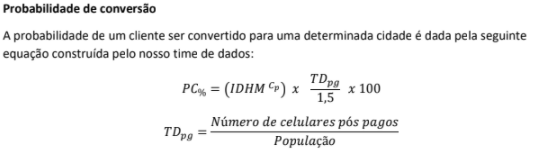

In [82]:
df_bancariza['Conversões'] =( (df_bancariza['IDHM 2010']**df_bancariza['CP']) * (df_bancariza['TD']/1.5) * (df_bancariza['População']) )
df_bancariza = df_bancariza.sort_values(['indicador'],ascending=True)
df_bancariza.head()

,Municipio,IDHM 2010,Estado,TD,População,n_agencias,n_postos,n_postosE,indicador,CP,Conversões
2073,TIMON,0.649,Maranhão,0.143950,170222,5,2,4,0.000065,20,2.870985
1135,CIDADE OCIDENTAL,0.717,Goiás,0.561462,72890,2,1,2,0.000069,15,185.645444
2397,PEDRA BRANCA,0.599,Ceará,0.220635,43309,1,1,1,0.000069,15,2.921221
2396,PEDRA BRANCA,0.603,Ceará,0.220635,43309,1,1,1,0.000069,15,3.227912
1722,BELFORD ROXO,0.684,Rio de Janeiro,0.598807,513118,14,5,17,0.000070,25,15.410460


Plot para conversões por estado

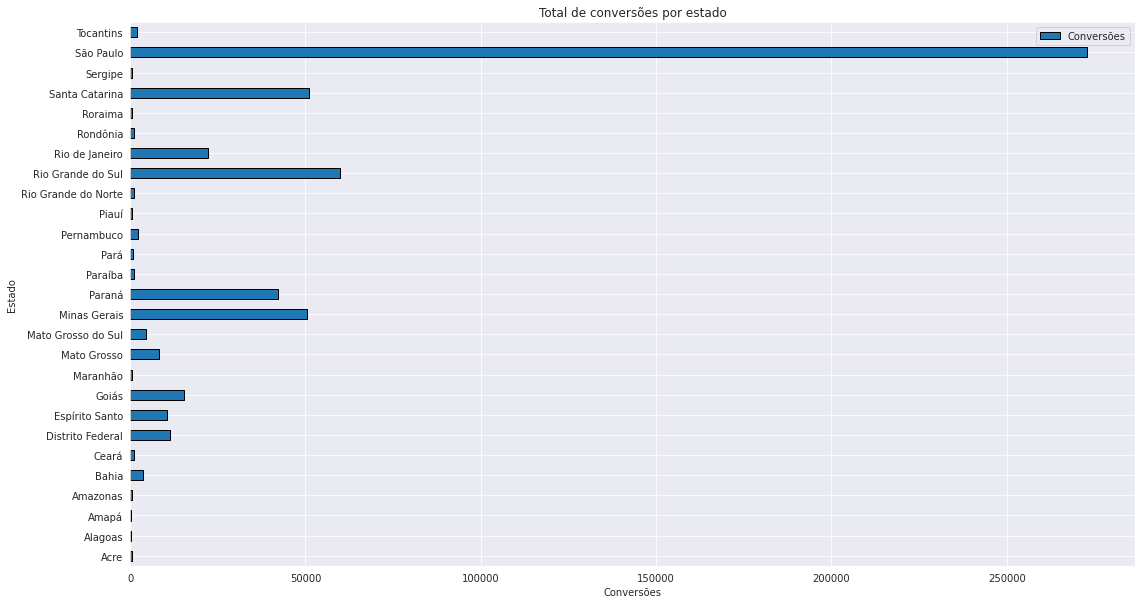

In [92]:
df_bancariza.groupby("Estado").agg({"Conversões":"sum"}).plot(kind="barh",
                                                              figsize = (18,10),
                                                               edgecolor = "k",
                                                               linewidth =1
                                                                                )
plt.title("Total de conversões por estado")
plt.xlabel("Conversões")
plt.show()

# Entrega Final

In [75]:
x= ['Municipio','Estado','População','indicador','Conversões']
df_final = df_bancariza[x]

#### Considerando os indicadores de bancarização mais baixos, para alcançar 1000 clientes seriam necessárias 22 cidades.

In [78]:
df_final = df_final.sort_values('indicador',ascending=True)
df_final.head(22)

,Municipio,Estado,População,indicador,Conversões
2073,TIMON,Maranhão,170222,0.000065,2.870985
1135,CIDADE OCIDENTAL,Goiás,72890,0.000069,185.645444
2397,PEDRA BRANCA,Ceará,43309,0.000069,2.921221
2396,PEDRA BRANCA,Ceará,43309,0.000069,3.227912
1722,BELFORD ROXO,Rio de Janeiro,513118,0.000070,15.410460
1375,IBIRITE,Minas Gerais,182153,0.000077,55.030922
1604,CAMARAGIBE,Pernambuco,158899,0.000082,21.903088
2607,BURITICUPU,Maranhão,72983,0.000082,1.050667
2394,ULIANOPOLIS,Pará,60761,0.000082,4.062774
1484,ALMIRANTE TAMANDARE,Paraná,120041,0.000083,34.269332


#### Definindo um número mínimo de conversões por município igual a 50, e considerando os indicadores de bancarização mais baixos, para alcançar 1000 clientes seriam necessárias 7 cidades.




In [79]:
selecao = (df_final['Conversões'] >= 50 ) 
df_final = df_final[selecao]
df_final = df_final.sort_values('indicador',ascending=True)
df_final.head(7)

,Municipio,Estado,População,indicador,Conversões
1135,CIDADE OCIDENTAL,Goiás,72890,0.000069,185.645444
1375,IBIRITE,Minas Gerais,182153,0.000077,55.030922
699,SAO GONCALO,Rio de Janeiro,1091737,0.000089,226.686045
747,MESQUITA,Rio de Janeiro,176569,0.000091,157.565093
734,FERRAZ DE VASCONCELOS,São Paulo,196500,0.000092,284.007281
1720,RIBEIRAO DAS NEVES,Minas Gerais,338197,0.000098,57.412844
261,PARNAMIRIM,Rio Grande do Norte,267036,0.000101,211.732196


#### Definindo um número mínimo de conversões por município igual a 100, e considerando os indicadores de bancarização mais baixos, para alcançar 1000 clientes seriam necessárias 5 cidades.

In [97]:
selecao = (df_final['Conversões'] >= 100 ) 
df_final = df_final[selecao]
df_final = df_final.sort_values('indicador',ascending=True)
df_final.head(5)

,Municipio,Estado,População,indicador,Conversões
1135,CIDADE OCIDENTAL,Goiás,72890,0.000069,185.645444
699,SAO GONCALO,Rio de Janeiro,1091737,0.000089,226.686045
747,MESQUITA,Rio de Janeiro,176569,0.000091,157.565093
734,FERRAZ DE VASCONCELOS,São Paulo,196500,0.000092,284.007281
261,PARNAMIRIM,Rio Grande do Norte,267036,0.000101,211.732196
